In [1]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image
import arff
from sklearn import preprocessing



In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'accuracy'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")
    
metrics = metrics[metrics['instances']>1000]
metrics = metrics[metrics['classifier'] == _CLASSIFIER]
metrics = metrics.set_index('dataset')

metrics = metrics.sort_values(by=_METRIC)

#metrics = metrics.head(20)
metrics.head()

,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
dataset,,,,,,,,,,,,
Phoneme,keras_parallel_3_Dilated_Conv,2100,1024,39,0.193842,0.126744,0.042445,0.023563,0.066008,8.913429,4.948216,8.913429
ShapesAll,keras_parallel_3_Dilated_Conv,1190,512,60,0.326249,0.299134,0.023296,0.022342,0.045638,2.772193,2.658742,2.772193
bankmarketingnorm,keras_parallel_3_Dilated_Conv,45201,16,2,0.517389,0.017242,0.019572,0.008246,0.027817,88.482899,37.279783,88.482899
higgs200k,keras_parallel_3_Dilated_Conv,199990,28,2,0.578386,0.145869,0.066426,0.007603,0.074029,1328.451441,152.047196,1328.451441
airlinesnorm,keras_parallel_3_Dilated_Conv,539373,7,2,0.595089,0.009025,0.041824,0.007612,0.049437,2255.926356,410.596742,2255.926356


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
metrics['total_time_mean_scaled'] = min_max_scaler.fit_transform(metrics['total_time_mean'].values.reshape(-1, 1))
metrics['instances_scaled'] = min_max_scaler.fit_transform(metrics['instances'].values.reshape(-1, 1))
metrics['attributes_scaled'] = min_max_scaler.fit_transform(metrics['attributes'].values.reshape(-1, 1))
metrics['classes_scaled'] = min_max_scaler.fit_transform(metrics['classes'].values.reshape(-1, 1))

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


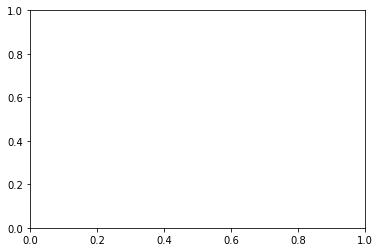

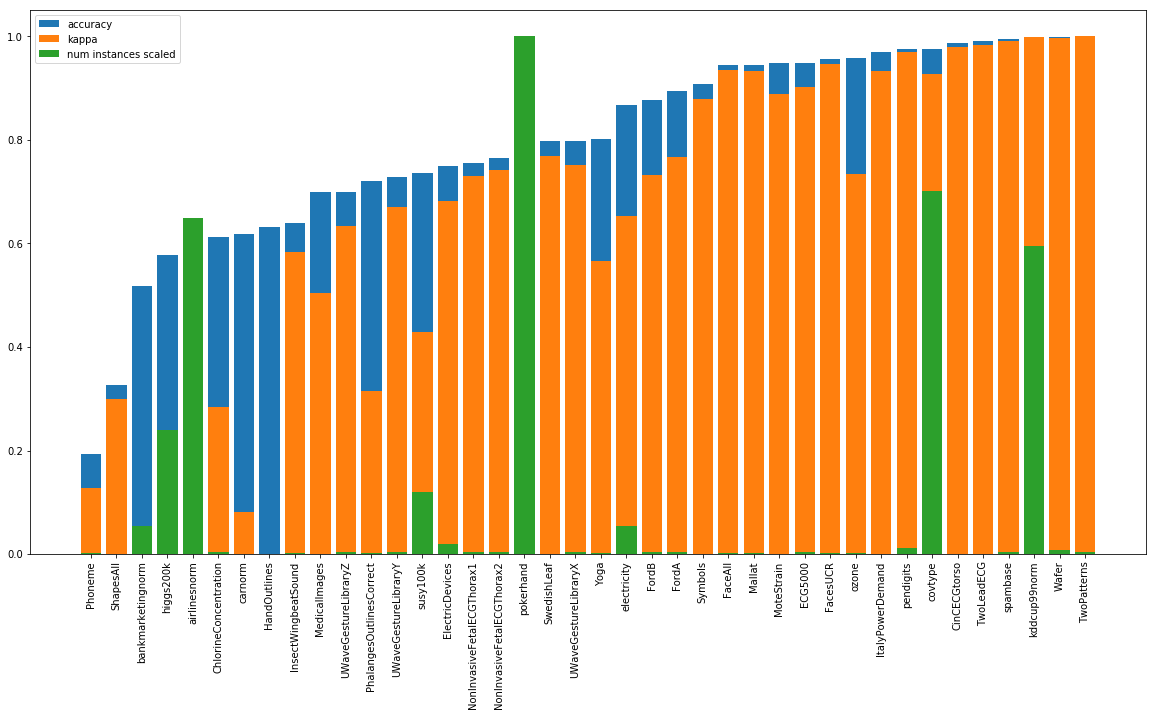

In [5]:
fig = plt.figure()
ax = plt.gca()
plt.figure(figsize=(20,10))
plt.bar(metrics.index,metrics['accuracy'], label='accuracy')
plt.bar(metrics.index,metrics['kappa'], label="kappa")
#plt.bar(metrics.index,metrics['total_time_mean_scaled'], label = "total time scaled")
plt.bar(metrics.index,metrics['instances_scaled'], label="num instances scaled")
#plt.bar(metrics.index,metrics['attributes_scaled'], label="num attributes scaled")
#plt.bar(metrics.index,metrics['classes_scaled'], label="num classes scaled")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

#plt.figure(figsize=(20,10))
#plt.bar(metrics.index,metrics['total'], label='instances')
#plt.legend(loc='best')
#plt.show()
#
#plt.figure(figsize=(20,10))
#plt.bar(metrics.index,metrics['train_time_s'], label='train_time')
#plt.legend(loc='best')
#plt.show()







In [6]:
metrics_total_no_big = metrics[metrics['total']<2000]
plt.figure(figsize=(20,10))
plt.bar(metrics_total_no_big.index,metrics_total_no_big['total'], label='num_instances')
plt.legend(loc='best')
plt.show()

metrics_train_no_big = metrics[metrics['train_time_s']<300]
plt.figure(figsize=(20,10))
plt.bar(metrics_train_no_big.index,metrics_train_no_big['train_time_s'], label='train_time')
plt.legend(loc='best')
plt.show()

KeyError: 'total'

In [ ]:
metrics[["kappa", "accuracy"]][metrics['kappa'].isna()]